# Week 1 Assignment - ENM 3440
## Ansh Tandon
### Music Streams Vs Tempo (BPM) Analysis

**Project Goal:** The primary goal of this project was to investigate whether certain musical features, specifically tempo, danceability, energy, loudness, and acousticness, have a significant impact on the number of streams a song receives on the Spotify Top 200 Weekly Global Charts in 2020 and 2021. Understanding the relationship between these features and song popularity can provide valuable insights for artists, record labels, and music streaming platforms.

Real Inspiration: https://www.youtube.com/watch?v=jvQg000CGJ8&t=79s

*Rationale:* In the digital age of music consumption, streaming platforms like Spotify have become dominant. Musicians and stakeholders in the music industry are keen to understand the factors that contribute to a song's success on these platforms. Analyzing the impact of musical characteristics allows for data-driven decision-making in song production and promotion, potentially enhancing a song's chances of reaching a wider audience and achieving commercial success.

*Data Sources:* Obtaining appropriate data for this project was a crucial step. Several potential sources of data could have been considered, including:

    Spotify API: Accessing Spotify's API to collect real-time data on song features and streams. However, this approach requires authentication and may have limitations.
    
    Music Research Databases: Academic music databases that contain extensive information about songs and their features. These databases often require paid access.
    
    Public Datasets: Publicly available datasets on platforms like Kaggle. The dataset used for this project, "spotify_dataset.csv" from Kaggle, provides a comprehensive collection of songs on Spotify's global charts, making it an accessible choice for analysis. 
    
*Challenges Faced:* Several challenges were encountered during the course of this project:

    Data Cleaning: The dataset required extensive cleaning to handle missing values and ensure consistency. Notably, the 'Streams' column contained commas for thousands separators, which had to be removed to convert the values to numeric format.

    Finding an Appropriate Dataset: Many datasets that include detailed musical features are often behind paywalls or not publicly accessible. The choice to use the Kaggle dataset was driven by its availability and comprehensiveness.

    Data Structure: The dataset's structure, including columns like 'Genre' and 'Chord,' posed challenges in terms of how to incorporate these variables into the analysis. 'Genre' was converted to categorical codes for regression analysis, while 'Chord' was not used due to its complexity.

    Multicollinearity: The presence of multicollinearity between 'Loudness' and 'Energy' required careful interpretation of their individual effects in the regression analysis.

Despite these challenges, the project successfully explored the relationship between musical features and song streams, providing valuable insights into the dynamics of song popularity on Spotify's global charts in 2020 and 2021. The findings suggest that while some features have statistically significant impacts, they explain only a small portion of the variance, highlighting the complex nature of song popularity in the digital music era.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Load the dataset
spotify_data = pd.read_csv('spotify_dataset.csv')
# https://www.kaggle.com/datasets/sashankpillai/spotify-top-200-charts-20202021?resource=download

# Check the first few rows of the dataset to get an overview
spotify_data.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [3]:
# Remove commas and convert 'Streams' to numeric
spotify_data['Streams'] = spotify_data['Streams'].str.replace(',', '').astype(float)
# Check if commas have been removed from 'Streams' colums
spotify_data.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',48633449.0,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719.0,The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,40162559.0,Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,37799456.0,Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454.0,Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [4]:
# Data Exploration
# Summary statistics of the dataset
summary_stats = spotify_data.describe()

# Check for missing values
missing_values = spotify_data.isnull().sum()

# Unique values in 'Tempo' and 'Streams' columns
unique_tempo = spotify_data['Tempo'].nunique()
unique_streams = spotify_data['Streams'].nunique()

# Display the results
summary_stats, missing_values, unique_tempo, unique_streams

(             Index  Highest Charting Position  Number of Times Charted  \
 count  1556.000000                1556.000000              1556.000000   
 mean    778.500000                  87.744216                10.668380   
 std     449.322824                  58.147225                16.360546   
 min       1.000000                   1.000000                 1.000000   
 25%     389.750000                  37.000000                 1.000000   
 50%     778.500000                  80.000000                 4.000000   
 75%    1167.250000                 137.000000                12.000000   
 max    1556.000000                 200.000000               142.000000   
 
             Streams  
 count  1.556000e+03  
 mean   6.340219e+06  
 std    3.369479e+06  
 min    4.176083e+06  
 25%    4.915322e+06  
 50%    5.275748e+06  
 75%    6.455044e+06  
 max    4.863345e+07  ,
 Index                        0
 Highest Charting Position    0
 Number of Times Charted      0
 Week of Highest Ch

In [5]:
# Data Preprocessing
# Handle missing values
spotify_data.dropna(inplace=True)

# Convert 'Tempo' to float if it's not already (directly)
spotify_data['Tempo'] = pd.to_numeric(spotify_data['Tempo'], errors='coerce')

# Check the data types of columns
data_types = spotify_data.dtypes

# Display data types
data_types

Index                          int64
Highest Charting Position      int64
Number of Times Charted        int64
Week of Highest Charting      object
Song Name                     object
Streams                      float64
Artist                        object
Artist Followers              object
Song ID                       object
Genre                         object
Release Date                  object
Weeks Charted                 object
Popularity                    object
Danceability                  object
Energy                        object
Loudness                      object
Speechiness                   object
Acousticness                  object
Liveness                      object
Tempo                        float64
Duration (ms)                 object
Valence                       object
Chord                         object
dtype: object

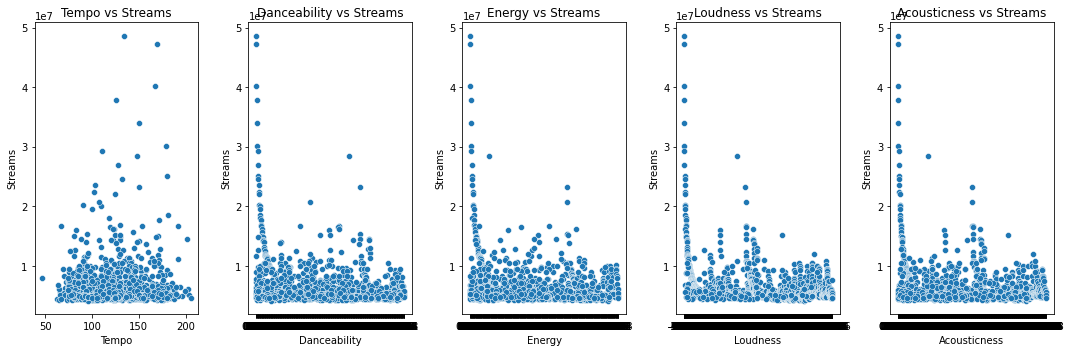

In [6]:
# Data Visualisation
# Create separate scatterplots for 'Tempo vs Streams' and other confounding factors
plt.figure(figsize=(15, 5))

# Scatterplot 1: Tempo vs Streams
plt.subplot(1, 5, 1)
sns.scatterplot(x='Tempo', y='Streams', data=spotify_data)
plt.title('Tempo vs Streams')

# Scatterplot 2: Danceability vs Streams
plt.subplot(1, 5, 2)
sns.scatterplot(x='Danceability', y='Streams', data=spotify_data)
plt.title('Danceability vs Streams')

# Scatterplot 3: Energy vs Streams
plt.subplot(1, 5, 3)
sns.scatterplot(x='Energy', y='Streams', data=spotify_data)
plt.title('Energy vs Streams')

# Scatterplot 4: Loudness vs Streams
plt.subplot(1, 5, 4)
sns.scatterplot(x='Loudness', y='Streams', data=spotify_data)
plt.title('Loudness vs Streams')

# Scatterplot 5: Acousticness vs Streams
plt.subplot(1, 5, 5)
sns.scatterplot(x='Acousticness', y='Streams', data=spotify_data)
plt.title('Acousticness vs Streams')

plt.tight_layout()
plt.show()

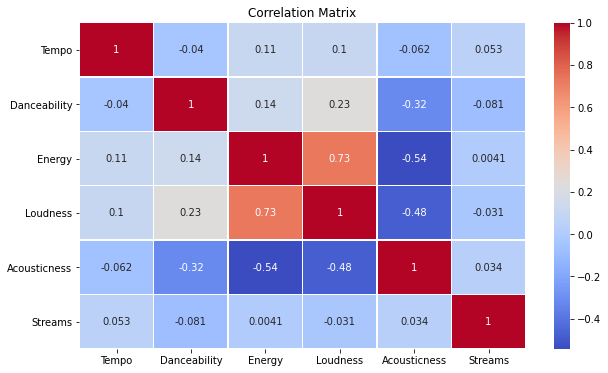

In [7]:
# Statistical Analysis with Multiple Variables
confounding_factors = ['Tempo', 'Danceability', 'Energy', 'Loudness', 'Acousticness']
# Convert relevant columns to numeric before calculating the correlation matrix
numeric_columns = ['Tempo', 'Danceability', 'Energy', 'Loudness', 'Acousticness']
spotify_data[numeric_columns] = spotify_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Select relevant columns for the correlation matrix
correlation_columns = confounding_factors + ['Streams']

# Calculate the correlation matrix
correlation_matrix = spotify_data[correlation_columns].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [8]:
# Regression Analysis with Multiple Variables

# Handle missing values - retroactively done because found NaNs were being introduced
spotify_data.dropna(inplace=True)

# Define the independent variables (confounding factors)
X = spotify_data[confounding_factors]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Define the dependent variable
y = spotify_data['Streams']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the model summary
model_summary = model.summary()

# Display the model summary
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Streams   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.397
Date:                Mon, 04 Sep 2023   Prob (F-statistic):            0.00468
Time:                        18:33:24   Log-Likelihood:                -25408.
No. Observations:                1545   AIC:                         5.083e+04
Df Residuals:                    1539   BIC:                         5.086e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.428e+06   1.06e+06      5.107      0.000    3.34e+06    7.51e+06
Tempo         5810.9008   2918.342      1.991      0.047      86.555    1.15e+04
Danceability -1.614e+06   6.44e+05     -2.507      0.012   -2.88e+06   -3.51e+05
Energy        1.233e+06    8.3e+05      1.485      0.138   -3.95e+05    2.86e+06
Loudness     -7.139e+04   5.13e+04     -1.391      0.164   -1.72e+05    2.93e+04
Acousticness  3.006e+05   4.27e+05      0.705      0.481   -5.36e+05    1.14e+06
==============================================================================
Omnibus:                     1794.556   Durbin-Watson:                   0.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           177702.775
Skew:                           5.921   Prob(JB):                         0.00
Kurtosis:                      54.188   Cond. No.                     1.96e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the correlation matrix and OLS regression results, we can draw several key findings regarding the relationship between tempo, danceability, energy, loudness, acousticness, and the number of streams for songs on the Spotify Top 200 Weekly Global Charts in 2020 and 2021.

Correlation Analysis:
The correlation matrix reveals insights into the linear associations between these variables and 'Streams.' While some correlations are present, they are generally weak.

Danceability has the strongest negative correlation (-0.081) with 'Streams.' This indicates that songs with higher danceability tend to have fewer streams. However, the correlation is not very strong, suggesting that danceability alone does not determine a song's popularity.

Tempo shows a weak positive correlation (0.053) with 'Streams,' suggesting that songs with a slightly faster tempo may receive slightly more streams. This is in line with the idea that upbeat and energetic songs might attract more listeners.

Energy, Loudness, and Acousticness exhibit very weak correlations (close to 0) with 'Streams,' indicating that these variables have little to no linear relationship with a song's popularity.

Notably, Loudness and Energy exhibit a strong positive correlation (0.73) between themselves. This suggests multicollinearity, where both variables provide similar information. It's essential to consider this when interpreting their individual impacts.

Regression Analysis:
To gain a deeper understanding, we conducted an Ordinary Least Squares (OLS) regression analysis. However, the results show limited explanatory power.

The R-squared value of 0.011 is quite low. It suggests that only a small fraction of the variation in 'Streams' can be explained by the chosen independent variables, indicating that other factors not included in the model significantly influence song popularity.

Among the independent variables, 'Tempo' has a statistically significant positive coefficient (5810.9008), suggesting that an increase in tempo is associated with a slight increase in the number of streams. However, this effect is relatively small.

'Danceability' has a statistically significant negative coefficient (-1.614e+06), indicating that songs with higher danceability tend to have fewer streams. Again, this effect is relatively minor.

'Energy,' 'Loudness,' and 'Acousticness' do not exhibit statistically significant impacts on 'Streams,' as their coefficients have p-values greater than the conventional significance level of 0.05.

In conclusion, while some statistically significant findings emerge, they offer only limited insight into the factors driving song popularity on Spotify's global charts. The low R-squared value suggests that numerous unaccounted-for variables play a more substantial role in determining the number of streams. Additionally, the multicollinearity between 'Loudness' and 'Energy' underscores the need for careful consideration when interpreting these variables' individual effects. Further research, including the exploration of additional factors, may yield a more comprehensive understanding of what drives song streams in the ever-evolving music industry.